#### @author: Александр Владимирович Толмачев | axtolm@gmail.com
<hr>

## 4. Методы анализа данных на Python

## Часть 5. Классификация с помощью логистической регрессии

### На этом занятии мы планируем научиться:
- Использовать логистическую регрессию в задаче классификации.

### 1. Набор данных для анализа

Рассмотрим применение **логистической регрессии** для задачи классификации на примере датасета "Ирисы Фишера".

**Описание датасета "Ирисы Фишера"**<br>
Датасет содержит данные по трем видам ирисов:
- Ирис щетинистый (Iris setosa), target = 0
- Ирис виргинский (Iris virginica), target = 2
- Ирис разноцветный (Iris versicolor), target = 1  

Всего в датасете представлено 150 экземпляров ирисов (по 50 на каждый вид).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений.<br> 
Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.<br><br>
Датасет входит в состав библиотеки sklearn.<br>Загрузим данные в таблицу pandas DataFrame.

In [1]:
import pandas as pd                # импорт библиотеки pandas
from sklearn import datasets       # импорт модуля с данными

In [2]:
iris = datasets.load_iris()     # загрузка данных (массив numpy)

In [3]:
df_iris = pd.DataFrame(iris.data)  # преобразуем в DataFrame, alias pd импортировали в начале
df_iris.columns = iris.feature_names    # делаем имена столбцов такие же, как имена переменных из датасета
df_iris['target'] = iris.target    # добавляем столбец с целевой переменной (класс ириса 0-1-2) 
df_iris['name'] = df_iris.target.apply(lambda x: iris.target_names[x])    # для наглядности добавляем столбец с сортами
print(len(df_iris))    # выводим размер таблицы
df_iris.head(3)    # выводим первые три строки таблицы

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


### 2. Подготовка данных для анализа

**Построим таблицу с зависимостями между признаками и раскрасим точки в зависимости от сортов ирисов**<br>
Воспользуемся библиотекой seaborn и методом seaborn.pairplot<br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html

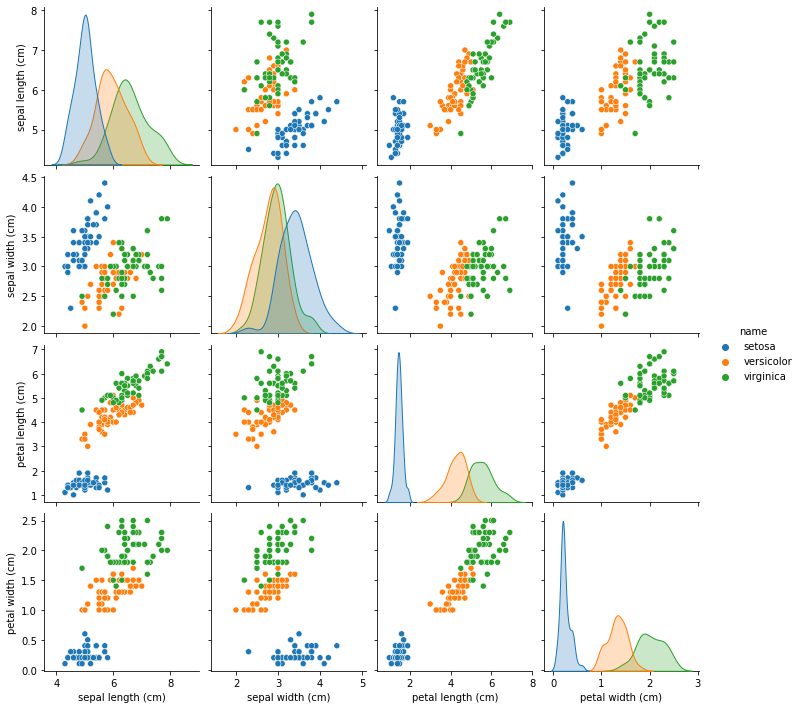

In [4]:
import seaborn as sns
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Для классификации лучше пространство признаков "petal width (cm)" - "petal length (cm)".<br>
Классификация в пространстве "sepal length (cm)" - "sepal width (cm)" проблематична, т.к. два типа точек перемешаны.<br>
Однако мы рассмотрим работу логистической регрессии на всех четырех признаках в качестве независимых переменных.

In [5]:
iris_data = iris.data[:, 0:4]      # x: возьмем все четыре столбца с признаками 
iris_label = iris.target           # y: 0-1-2 метки классов ирисов

Выделим данные для обучения и тестовые данные из исходной выборки случайным образом в соотношении 80/20<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split    # импорт метода
train_data, test_data, train_labels, test_labels = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 10)

Стандартизация (масштабирование) входных данных не требуется.

### 3. Логистическая регрессия

В основе **логистической регрессии** лежит многомерная линейная регрессия: $Y = k_{1}X_{1} + k_{2}X_{2} + ... + k_{n}X_{n} + b$,<br> в которой зависимая переменная $Y$ является бинарной, то есть может принимать только два значения (например, $А$ или $В$).
<br><br>
Задача - вычислить вероятности $А$ и $В$ и классифицировать вектор признаков $(X_{1}, X_{2},...,X_{n})$ к одному из классов.
<br><br>
Так как возможные значения вероятности лежат в $[0..1]$, а линейная регрессия в общем случае может давать значения $Y\in R$,<br> то для расчета вероятностей в модель добавляется логит-преобразование: $P = \frac{1}{1+e^{-Y}}$, которое обеспечивает преобразование $R \to [0..1]$.
<br><br>
Логистическая регрессия, как и линейная регрессия, представляет собой алгоритм обучения с учителем.
<br><br>
Как выглядит логит-преобразование (построим его прямо тут по точкам):

<AxesSubplot:xlabel='Y'>

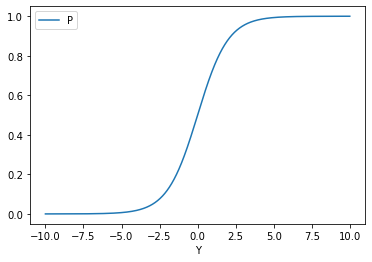

In [7]:
# построение графика для логит-преобразования
import pandas as pd
import math as m
def get_df_fun(start_x, finish_x, n_points):     # функция получения точек графика
    res = pd.DataFrame()
    x_step = abs(finish_x-start_x)/(n_points - 1)
    res['Y'] = [(start_x + x_step*i) for i in range(n_points)]
    res['P'] = list(map(lambda Y: 1/(1+m.exp(-Y)), res['Y']))
    return res
start_x = -10; finish_x = 10; n_points = 2000
df = get_df_fun(start_x, finish_x, n_points)
df.plot(x='Y', y='P')    # построение графика по точкам

В базовой модели логистической регрессии предполагается, что зависимая переменная принимает два значения, однако модель можно обобщить и на большее количество классов.
<br><br>
На практике логистическая регрессия используется для решения задач классификации с линейно-разделяемыми классами.

**Библиотека для моделирования логистической регрессии**<br>
Воспользуемся библиотекой sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
from sklearn.linear_model import LogisticRegression    # импорт класса из библиотеки

In [9]:
# создание модели - все параметры по умолчанию, меняем только кол-во итераций и стартовое значение генератора случайных чисел 
# по умолчанию max_iter (int, default=100) - иногда этого мало
logit_model = LogisticRegression(max_iter = 1000, random_state = 11)   

In [10]:
logit_model.fit(train_data, train_labels)    # обучение модели на train выборке

LogisticRegression(max_iter=1000, random_state=11)

#### Проверка модели на выборке для обучения

In [11]:
train_expected = train_labels     # фактические значения
train_predicted = logit_model.predict(train_data)    # прогнозные значения

Оценим результаты классификации по метрикам:<br>
**Confusion Matrix (матрица ошибок)**, **Accuracy (доля правильных ответов)**, **Precision (точность)**, **Recall (полнота)**.<br>
Интерпретация показателей была рассмотрена при изучении классификации с помощью многослойного персептрона.

In [12]:
from sklearn import metrics    # импорт 
print(metrics.confusion_matrix(train_expected, train_predicted))
print(metrics.classification_report(train_expected, train_predicted))

[[40  0  0]
 [ 0 34  3]
 [ 0  0 43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.92      0.96        37
           2       0.93      1.00      0.97        43

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Как и ожиддалось, линейно разделить 1-й и 2-й классы не удалось.

#### Проверка модели на тестовой выборке

In [13]:
test_expected = test_labels     # фактические значения
test_predicted = logit_model.predict(test_data)    # прогнозные значения

In [14]:
from sklearn import metrics    # импорт 
print(metrics.confusion_matrix(test_expected, test_predicted))
print(metrics.classification_report(test_expected, test_predicted))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Все идеально? А не зависит ли полученная "идеальность" от способа формирования выборки? Для этого есть кросс-валидация!

**Кросс-валидация**<br>
Чтобы уменьшить зависимость показателей модели от способа выделения выборки для обучения и тестирования, существует кросс-валидация.<br>
Датасет делится на $N$ частей и выполняется $N$ итераций обучения и тестирования.<br>
На каждой итерации $N-1$ частей выборки идёт на $train$, и $1$ на $test$.<br>
На выходе - вектор из $N$ значений метрики, например, **Accuracy (доля правильных ответов)**, значения которой можно усреднить.

В sklearn для этого есть специальный метод cross_val_score:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
scores = cross_val_score(logit_model, train_data, train_labels, cv = 20) # cv - кол-во итераций и частей для разбиения выборки
print(scores.round(2))    # выведем массив с долей правильных ответов на каждой итерации  
np.mean(scores).round(3)  # выведем среднее значение доли правильных ответов

[1.   1.   0.83 1.   1.   0.83 0.83 1.   1.   1.   1.   1.   1.   1.
 1.   0.83 1.   1.   1.   1.  ]


0.967

Если разбиваем train_data из 120 элементов на 20 частей, то будет 20 итераций и в каждой обучение на 114 элементах и тестирование на 6. Если 1 из 6 классифицирован неверно - доля правильных ответов будет 5/6 = 0.83, что и видим в ряде случаев.

#### Что есть в модели логистической регрессии библиотеки sklearn еще?

__Долю правильных ответов__ можно получить и без кросс-валидации с помощью метода `score`

In [17]:
logit_model.score(train_data, train_labels)

0.975

При тестировании на выборке для обучения у нас было 3 неверных классификации. Т.е. доля правильных ответов (120-3)/120 = 0.975

__Вероятности__, на основании которых выполнена кассификация, можно получить с помощью метода `predict_proba`

In [18]:
# выведем вероятности для первых трех элементов с округлением до 2-х знаков после запятой
logit_model.predict_proba(test_data[:3,:]).round(2)

array([[0.  , 0.88, 0.11],
       [0.  , 0.14, 0.86],
       [0.97, 0.03, 0.  ]])

In [19]:
# выведем предсказанные метки классов на основании этих вероятностей
test_predicted[:3]

array([1, 2, 0])

На примере первого элемента - трем классам `[0,1,2]` соответствуют три вероятности `[0.00,0.88,0.11]`.<br>
Максимальная вероятность 0.88 позволяет сделать прогноз, что элемент относится к классу 1.

### Как результаты? 
1. Логистическая регрессия позволяет делать классификацию на уровне других инструментов, если в выбранном пространстве признаков классы линейно-разделяемы. 

### Подведем итоги. На этом занятии мы научились:
- Использовать алгоритм логистической регрессии в задаче классификации.